# **금융경제학**

- 금융경제학 (박기영 저, 시그마프레스) 교재에 사용된 데이터/모형/그래프 관련 작업을 수행하는 python notebook 파일임: https://github.com/FinancialEconomicsPython
- python 코드는 구글 코랩에서 사용하는 것을 기준으로 작성되었음.
- 데이터 파일이 필요한 경우 위치: https://drive.google.com/drive/folders/1sArqUZKnxWtkNtHe31iD1w-2xCVEhTj0?usp=share_link
- date: 2025/3/22, updated: 2026/2/4

# 사전준비
## 수정이 필요한 부분

- 아래 셀에서 BASE에는 본인의 구글 드라이브 경로, key_api_ECOS에는 본인의 한국은행 ECOS open API key를 입력해야 합니다.
  - 한국은행 ECOS open API key 신청은 다음 링크에서 할 수 있습니다: https://ecos.bok.or.kr/api/#/

- UTILS, FIGS의 경우 BASE에서 지정한 폴더 아래 UTILS, FIGS 폴더를 동일하게 만들고 해당 폴더에 있는 파일들을 저장할 경우 수정할 필요 없습니다.



In [1]:
# ============================
# 🎯 사용자별 맞춤 설정 영역
# ============================

# Google Drive 상 Colab 프로젝트 기본 폴더 경로 (각자 환경에 맞게 수정)
BASE = "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics"

# 한국은행 ECOS API 인증키 (개인별 발급)
key_api_ECOS = "YOUR_ECOS_API_KEY_HERE"

if ("YOUR_ECOS_API_KEY_HERE" in key_api_ECOS):
    print("⚠️ ECOS API 인증키가 설정되지 않았습니다.")
    print("   'key_api_ECOS'에 본인의 API 키를 입력한 뒤 다시 실행하세요.")
    raise SystemExit

# 서브폴더 지정
UTILS = "/content/resources/utils"   # git clone 경로
FIGS  = os.path.join(BASE, "figures")
os.makedirs(FIGS, exist_ok=True)

## Preamble 및 필요한 라이브러리/함수 불러오기
- PublicDataReader 라이브러리 불러오기
- utils 폴더에 있는 preamble_core.py 불러오기
  - google drive 연결
  - 출력 DPI 조정
- utils 폴더에 있는 plot_utils.py 불러오기
  - plot_dual_axis를 이용해서 y축 왼쪽, 오른쪽 모두 사용하는 그림 그리기
- koreanize_matplotlib 라이브러리: 그림에서 한글 깨짐 방지

In [2]:
# PublicDataReader 라이브러리 불러오기
!pip -q install publicdatareader
from PublicDataReader import Ecos

# ============================
# 📦 Preamble 불러오기
# ============================

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import sys, os, importlib
if UTILS not in sys.path:
    sys.path.append(UTILS)

# preamble_core 불러오기
from preamble_core import setup_notebook, bind_env, save_fig

# 노트북 공통 환경 설정
setup_notebook(save_dir=FIGS, seaborn_use=True)
bind_env(globals())   # Colab에서도 plt/np/pd 활성화

# Colab 화면 출력용/파일 저장용 DPI 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100   # 화면 렌더링
plt.rcParams["savefig.dpi"] = 600  # 파일 저장

# 그래프 그리는 plot_dual_axis() 불러오기
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_dual_axis

# koreanize_matplotlib 설치
# 1. 라이브러리 설치 (이미 되어 있다면 생략 가능)
!pip -q install koreanize-matplotlib

# 2. 임포트
import koreanize_matplotlib
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.0/186.0 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 97.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.3 which is incompatible.
google-adk 1.23.0 requires requests<3.0.0,>=2.32.4, but you have requests 2.32.3 which is incompatible.
Mounted at /content/drive
✅ Notebook environment initialized.
📂 Figures will be saved to: /content/drive/MyDrive/Colab Notebooks/book_Fin

## NBER recession dates 불러오기
- utils 폴더의 nber_utils를 통해 NBER recession dates 불러오기

✅ nber_utils ready (functions: load_and_process_nber_data, plot_nber_recession)
✅ NBER recession data loaded successfully.
📅 Number of cycles detected: 34
✅ NBER monthly cycles loaded: 34 periods


,peak,trough
26,1969-12-01,1970-11-01
27,1973-11-01,1975-03-01
28,1980-01-01,1980-07-01
29,1981-07-01,1982-11-01
30,1990-07-01,1991-03-01
31,2001-03-01,2001-11-01
32,2007-12-01,2009-06-01
33,2020-02-01,2020-04-01


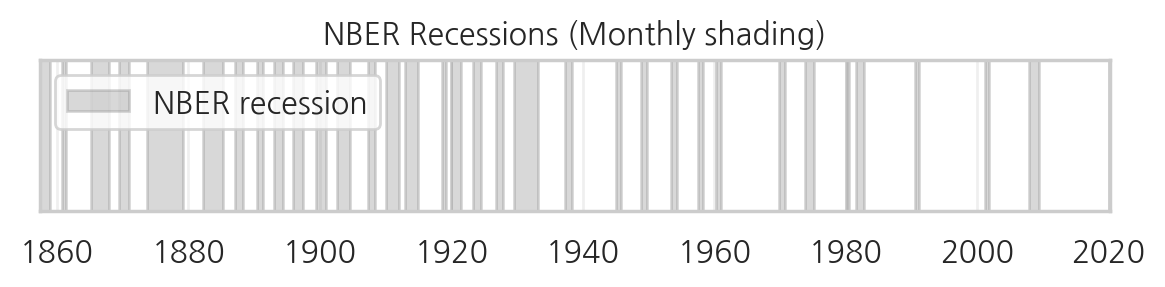

In [3]:
# ============================
# 📊 NBER 경기순환 데이터 로딩
# ============================

import nber_utils

# Colab 전역 네임스페이스에 함수 주입 (load_and_process_nber_data, plot_nber_recession)
if hasattr(nber_utils, "bind_env"):
    nber_utils.bind_env(globals())
else:
    print("⚠️ bind_env() not found in nber_utils (확인 필요).")

# NBER Business Cycle Dating Committee spreadsheet
url = "https://www.nber.org/sites/default/files/2023-03/BCDC_spreadsheet_for_website.xlsx"
NBERm, NBERq = nber_utils.load_and_process_nber_data(url)

print(f"✅ NBER monthly cycles loaded: {len(NBERm)} periods")
display(NBERm.tail(8))

# ============================
# 🖼️ 예시: 경기침체 구간 시각화
# ============================

fig, ax = plt.subplots(figsize=(6, 1.6))
ax.set_xlim(pd.Timestamp("1961-01-01"), pd.Timestamp("2025-12-31"))
ax.set_ylim(0, 1)
ax.set_yticks([])

plot_nber_recession(ax, NBERm, clip_to_xlim=True, keep_xlim=True, label="NBER recession")

ax.set_title("NBER Recessions (Monthly shading)", fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

# END OF PREAMBLE

# Main

## 은행 대차대조표: 부채

- FRED의 은행 대차대조표 항목을 다음을 참고하시오: https://fred.stlouisfed.org/release/tables?rid=482&eid=1217638#snid=1217697

In [4]:
from datetime import datetime

# import total assets, total loans, securities of US banks (quarterly)
var_list = ['QBPBSTLK','QBPBSTLKDP','QBPBSTLKDPDOFFDPNIDP','QBPBSTLKTEQKTBKEQK']
start = datetime(2000,1,1)
end = datetime(2024,7,31)

df_liability = pdr.get_data_fred(var_list, start=start, end=end)
df_liability.columns = ['부채(자기자본 포함)', '예금', '무이자부 예금','자기자본']

# 단위를 billion으로
df_liability = df_liability/1000
print(df_liability.head())

            부채(자기자본 포함)        예금  무이자부 예금    자기자본
DATE                                              
2000-01-01    7,004.568 4,590.221  722.924 586.378
2000-04-01    7,163.614 4,689.860  733.552 599.395
2000-07-01    7,269.388 4,749.131  722.281 621.295
2000-10-01    7,462.898 4,914.760  771.000 633.276
2001-01-01    7,572.689 4,948.420  743.571 653.702


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/bankBS_liability.png


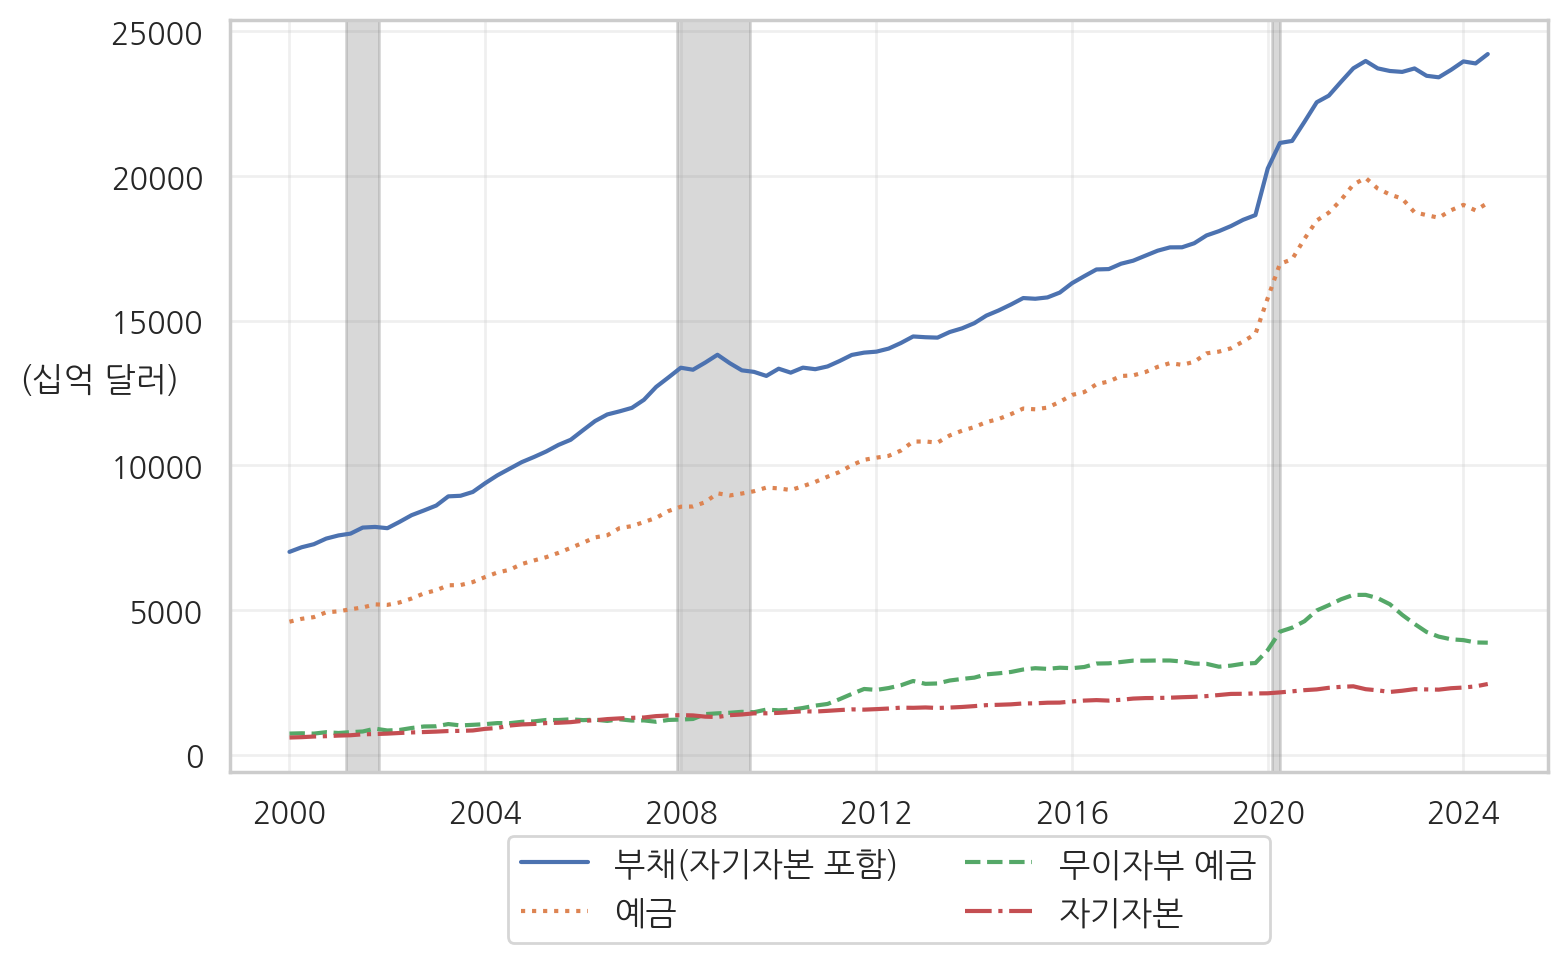

In [5]:
start_year = '2000'
end_year = '2024'

fig, ax = plt.subplots()

ax.plot(df_liability[['부채(자기자본 포함)']], linestyle='solid')
ax.plot(df_liability[['예금']], linestyle='dotted')
ax.plot(df_liability[['무이자부 예금']], linestyle='dashed')
ax.plot(df_liability[['자기자본']], linestyle='dashdot')

plot_nber_recession(ax, NBERm)

plt.legend(['부채(자기자본 포함)', '예금', '무이자부 예금','자기자본'], fontsize = 12,
           loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)

ax.set_xlabel('')
ax.set_ylabel('(십억 달러)', rotation=0)

ax.grid()
plt.grid()
save_fig('bankBS_liability')

plt.show()

In [6]:
# 자산 대비 대출, 지준 비중
df_liab_ratio = 100*df_liability.div(df_liability['부채(자기자본 포함)'],axis=0)

print('자산 대비 비중 (2007Q1)')
print(df_liab_ratio.loc['2007-01',['예금', '무이자부 예금','자기자본']].mean())
print('')

print('자산 대비 비중 (2004-2007)')
print(df_liab_ratio.loc['2004':'2007',['예금', '무이자부 예금','자기자본']].mean())
print('')

print('자산 대비 비중 (2010-2023)')
print(df_liab_ratio.loc['2010':'2023',['예금', '무이자부 예금','자기자본']].mean())
print('')

print('자산 대비 비중 (2024Q1)')
print(df_liab_ratio.loc['2024-01',['예금', '무이자부 예금','자기자본']].mean())

자산 대비 비중 (2007Q1)
예금        65.892
무이자부 예금    9.796
자기자본      10.578
dtype: float64

자산 대비 비중 (2004-2007)
예금        65.169
무이자부 예금   10.505
자기자본      10.244
dtype: float64

자산 대비 비중 (2010-2023)
예금        76.740
무이자부 예금   18.029
자기자본      10.822
dtype: float64

자산 대비 비중 (2024Q1)
예금        79.298
무이자부 예금   16.503
자기자본       9.662
dtype: float64


## 은행 대차대조표: 자산

In [7]:
# import total assets, total loans, securities of US banks (quarterly)
var_list = ['QBPBSTAS','QBPBSTASTLN','QBPBSTASSC']
start = datetime(2000,1,1)
end = datetime(2024,7,31)

df_asset = pdr.get_data_fred(var_list, start=start, end=end)
df_asset.columns = ['자산', '대출', '유가증권']

# 지준과 같은 단위로
df_asset = df_asset/1000
print(df_asset.head())

                  자산        대출      유가증권
DATE                                    
2000-01-01 7,004.568 4,341.138 1,339.655
2000-04-01 7,163.614 4,502.735 1,325.423
2000-07-01 7,269.388 4,601.208 1,337.956
2000-10-01 7,462.898 4,643.324 1,360.957
2001-01-01 7,572.689 4,677.838 1,328.589


In [8]:
# import reserves of US banks (monthly) and convert it into quarterly
var_list = ['TOTRESNS']
start = datetime(2000,1,1)
end = datetime(2024,7,31)

df_reserve = pdr.get_data_fred(var_list, start=start, end=end)
df_reserve.columns = ['지준']

# convert to quarterly
df_reserveQ = df_reserve.resample('Q-JAN').mean()

# let the date start in the first day of each month, not the last day
df_reserveQ.index = df_reserveQ.index - pd.offsets.MonthBegin(1)

df_reserveQ.head(5)

,지준
DATE,
2000-01-01,44.200
2000-04-01,40.800
2000-07-01,40.300
2000-10-01,39.167
2001-01-01,38.900


In [9]:
df_asset = pd.concat([df_asset,df_reserveQ],axis=1)
df_asset.tail(5)

,자산,대출,유가증권,지준
DATE,,,,
2023-07-01,"23,408.427","12,344.411","5,303.467","3,226.633"
2023-10-01,"23,666.510","12,452.086","5,434.683","3,248.033"
2024-01-01,"23,957.765","12,417.297","5,474.591","3,467.500"
2024-04-01,"23,888.162","12,543.037","5,457.823","3,513.433"
2024-07-01,"24,212.100","12,619.885","5,563.687","3,352.667"


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/bankBS_assets.png


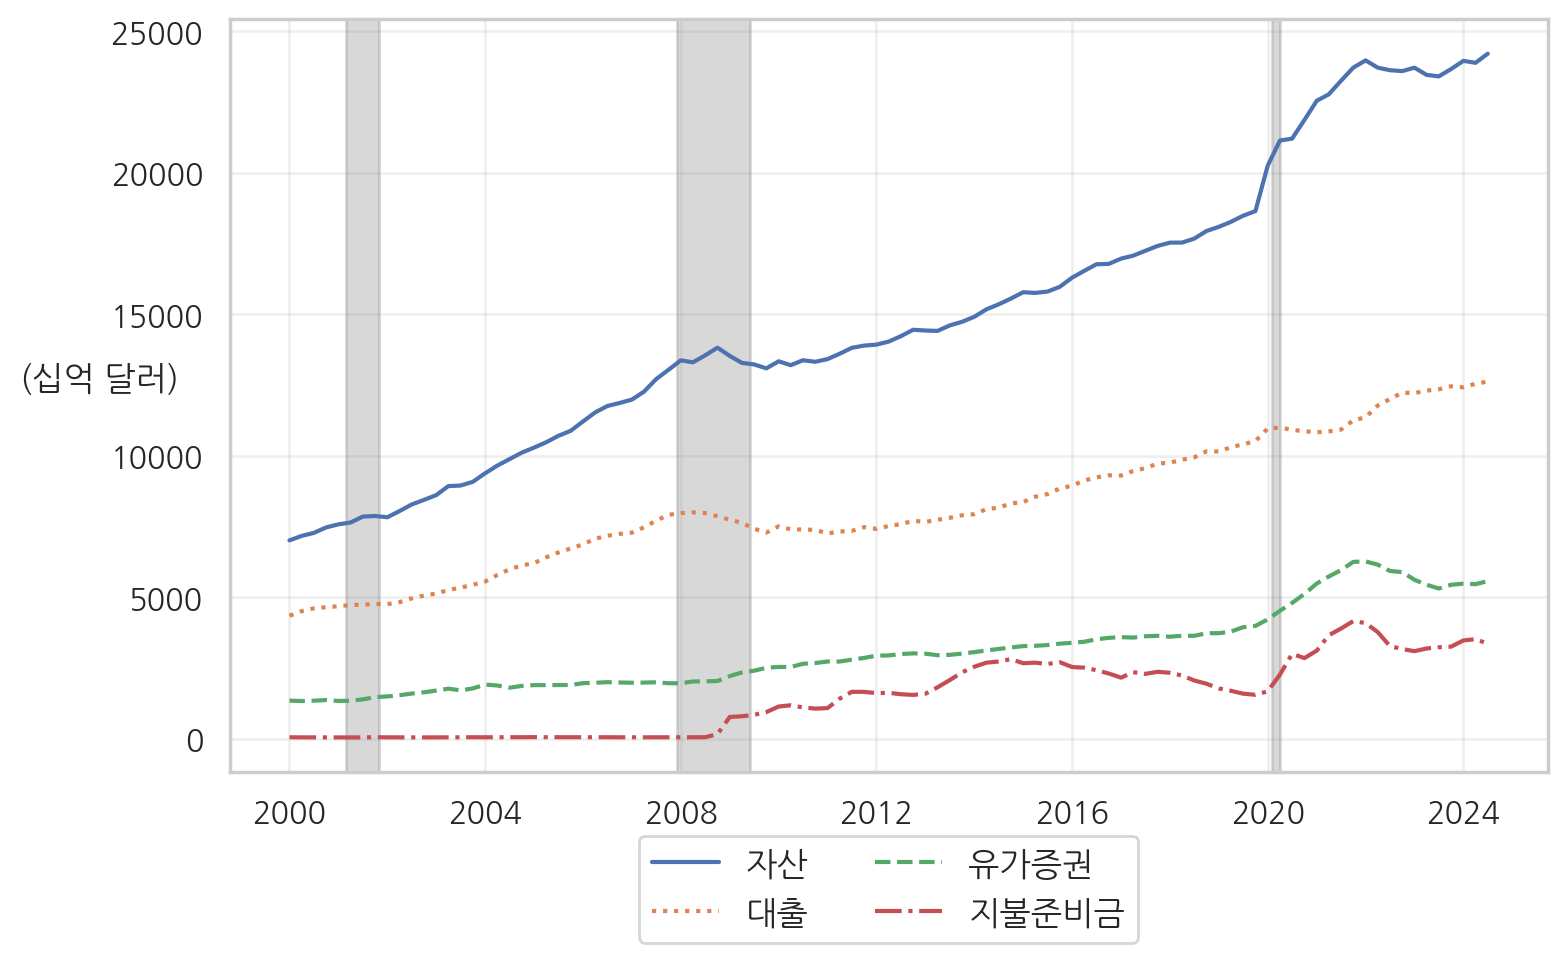

In [10]:
start_year = '2000'
end_year = '2023'

fig, ax = plt.subplots()

ax.plot(df_asset[['자산']], linestyle='solid')
ax.plot(df_asset[['대출']], linestyle='dotted')
ax.plot(df_asset[['유가증권']], linestyle='dashed')
ax.plot(df_asset[['지준']], linestyle='dashdot')

plot_nber_recession(ax, NBERm)

plt.legend(['자산','대출','유가증권','지불준비금'], fontsize = 12,
           loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)

ax.set_xlabel('')
ax.set_ylabel('(십억 달러)', rotation=0)

ax.grid()
plt.grid()
save_fig('bankBS_assets')

plt.show()

In [11]:
# 자산 대비 대출, 지준 비중
df_asset_ratio = 100*df_asset.div(df_asset['자산'],axis=0)

print('자산 대비 대출, 지준의 비중 (2007Q1)')
print(df_asset_ratio.loc['2007-01',['대출','유가증권','지준']].mean())
print('')

print('자산 대비 대출, 지준의 비중 (2004-2007)')
print(df_asset_ratio.loc['2004':'2007',['대출','유가증권','지준']].mean())
print('')

print('자산 대비 대출, 지준의 비중 (2010-2023)')
print(df_asset_ratio.loc['2010':'2023',['대출','유가증권','지준']].mean())
print('')

print('자산 대비 대출, 지준의 비중 (2024Q1)')
print(df_asset_ratio.loc['2024-01',['대출','유가증권','지준']].mean())

자산 대비 대출, 지준의 비중 (2007Q1)
대출     60.737
유가증권   16.461
지준      0.362
dtype: float64

자산 대비 대출, 지준의 비중 (2004-2007)
대출     60.766
유가증권   17.453
지준      0.408
dtype: float64

자산 대비 대출, 지준의 비중 (2010-2023)
대출     53.452
유가증권   21.577
지준     13.081
dtype: float64

자산 대비 대출, 지준의 비중 (2024Q1)
대출     51.830
유가증권   22.851
지준     14.473
dtype: float64


## 부외 대차대조표: 대출약정

In [12]:
# import total assets, total loans, reserves of US banks

var_list = ['QBPBSTASTLN','ACILACB','QBPBSNLN', 'QBPBSNLNNLN']
start = datetime(2000,1,1)
end = datetime(2024,7,31)

df_lc = pdr.get_data_fred(var_list, start=start, end=end)
df_lc.columns = ['대출', 'C&I 대출', '대출약정','대출약정(C&I 대출)']

# 단위를 billion으로
df_lc = df_lc/1000
print(df_lc.head())

                  대출    C&I 대출      대출약정  대출약정(C&I 대출)
DATE                                                  
2000-01-01 4,341.138 1,028.309 4,286.164     1,576.287
2000-04-01 4,502.735 1,058.101 4,399.846     1,588.433
2000-07-01 4,601.208 1,073.303 4,595.726     1,612.903
2000-10-01 4,643.324 1,096.015 4,733.681     1,627.239
2001-01-01 4,677.838 1,079.619 4,842.034     1,623.474


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/bankBS_lc.png


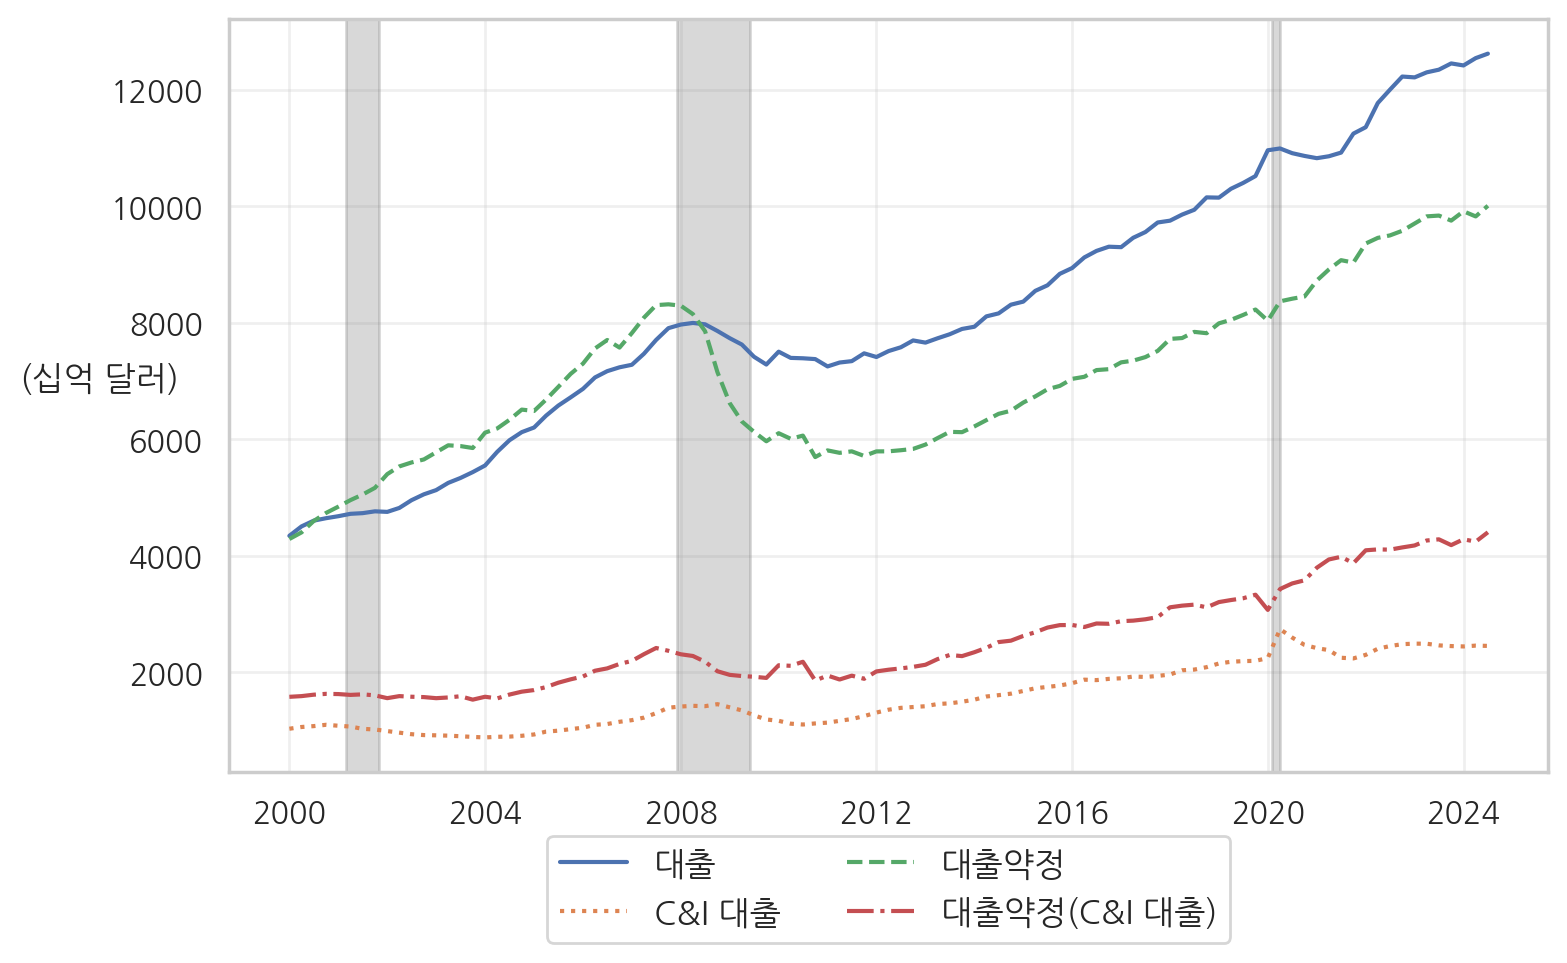

In [13]:
start_year = '2000'
end_year = '2023'

fig, ax = plt.subplots()

ax.plot(df_lc[['대출']], linestyle='solid')
ax.plot(df_lc[['C&I 대출']], linestyle='dotted')
ax.plot(df_lc[['대출약정']], linestyle='dashed')
ax.plot(df_lc[['대출약정(C&I 대출)']], linestyle='dashdot')

plot_nber_recession(ax, NBERm)

plt.legend(['대출', 'C&I 대출', '대출약정','대출약정(C&I 대출)'], fontsize = 12,
           loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)

ax.set_xlabel('')
ax.set_ylabel('(십억 달러)', rotation=0)

ax.grid()
plt.grid()
save_fig('bankBS_lc')

plt.show()

In [14]:
# 상대 비중
df_lc_ratio1 = 100*df_lc.div(df_lc['대출'],axis=0)
df_lc_ratio2 = 100*df_lc.div(df_lc['C&I 대출'],axis=0)

print('대출 대비 대출약정 비중 (2024Q1)')
print(df_lc_ratio1.loc['2024-01',['대출약정']].mean())

print('C&I 대출 대비 C&I 대출약정 비중 (2024Q1)')
print(df_lc_ratio2.loc['2024-01',['대출약정(C&I 대출)']].mean())

대출 대비 대출약정 비중 (2024Q1)
대출약정   79.831
dtype: float64
C&I 대출 대비 C&I 대출약정 비중 (2024Q1)
대출약정(C&I 대출)   175.369
dtype: float64
